In [2]:
!git clone https://github.com/alevant/mlcourse mlcourse

Cloning into 'mlcourse'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 60 (delta 17), reused 14 (delta 14), pack-reused 40
Unpacking objects: 100% (60/60), done.


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline
import datetime
from scipy import stats

In [4]:
df =pd.read_csv("./mlcourse/Salary_Data.csv")

In [5]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [8]:
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3]])

In [9]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088.])

In [10]:
# training the simple linear regresion on trainning set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [11]:
y_predict = regressor.predict(x_test)

In [12]:
x_train

array([[ 7.9],
       [ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [13]:
y_train

array([101302.,  56642.,  66029.,  64445.,  61111., 113812.,  91738.,
        46205., 121872.,  60150.,  39891.,  81363.,  93940.,  57189.,
        54445., 105582.,  43525.,  39343.,  98273.,  67938.,  56957.])

In [26]:
slope, inter, rval, pval,stderr = stats.linregress(x_train.flatten(),y_train)

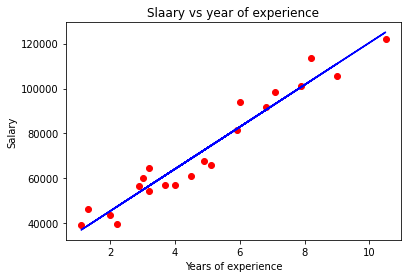

In [15]:
# training set results

plt.scatter(x_train,y_train, color = 'red')
plt.plot(x_train,regressor.predict(x_train), color ='blue')
plt.title('Slaary vs year of experience')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

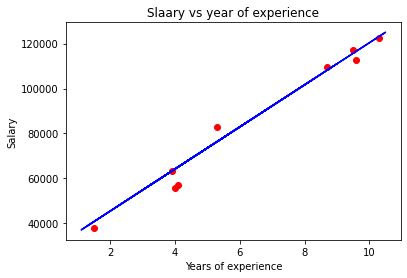

In [16]:
# test set results

plt.scatter(x_test,y_test, color = 'red')
plt.plot(x_train,regressor.predict(x_train), color ='blue')
plt.title('Slaary vs year of experience')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

In [17]:
regressor.predict([[5.8]])

array([81066.90680112])

In [18]:
a=regressor.coef_

In [19]:
b=regressor.intercept_


In [20]:
Yhat=a*(x_train.flatten())+b

In [21]:
YResidual=y_train-Yhat

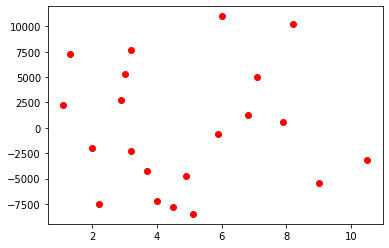

In [22]:
plt.scatter(x_train.flatten(),YResidual, color = 'red')

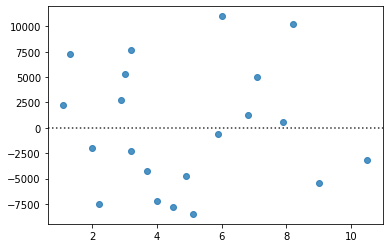

In [23]:
sns.residplot(x=x_train, y=y_train, data=df)
plt.show()

In [27]:
pval

3.1195253367758824e-13

In [32]:
YM=y_train.sum()/y_train.size

In [37]:
SSR=((Yhat-YM)**2).sum()


In [50]:
SST=((y_train-YM)**2).sum()

In [53]:
SSE=((y_train-Yhat)**2).sum()

In [51]:
R2=SSR/SST
R2

0.942377765219338

In [49]:
R2=r2_score(y_train,Yhat)
R2

0.9423777652193379

In [54]:
MSE=SSE/y_train.size
MSE

35116032.63186063

In [43]:
MSE=mean_squared_error(y_train,Yhat)
MSE

35116032.63186063

In [46]:
MSETest=mean_squared_error(y_test,y_predict)
MSETest

23370078.800832972